In [2]:
user = "Alex"
pathtorepo = "C:\\Users\\" * user * "\\Desktop\\"

using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
include("C:\\Users\\" * user * "\\Desktop\\dynamical-systems\\system.jl")

using StaticArrays, DifferentialEquations, DynamicalSystems, LinearAlgebra
E, x, y = 0..30, 0..1, 0..1
box = E × x × y
using CairoMakie, GLMakie

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


In [2]:
const τ = 0.013;  const τD = 0.07993;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58; const ΔU0 = 0.305; 

In [3]:
time = 500; tt = 1000; tstep = 0.001
integ_set = (alg = Vern9(), adaptive = false, dt = 0.001)

(alg = Vern9(stage_limiter! = trivial_limiter!, step_limiter! = trivial_limiter!, thread = static(false), lazy = true), adaptive = false, dt = 0.001)

In [4]:
I0 = -1.6782; U0 = 0.265
p = [α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0];

In [21]:
u0 = [0.0, 0.0, 0.0]
ds = CoupledODEs(TM, u0, p, diffeq = integ_set)

fp, ei, _ = fixedpoints(ds, box, jacob_TM_);
Jac = jacob_TM_(fp[1], p, 0)
eivecs = eigvecs(Jac)
shift = real(eivecs[:, 1])*1e-9 + fp[1];

In [6]:
prob_hom = ODEProblem(TM, shift, (0.0, 1000), p)
sol_hom = solve(prob_hom, alg = Vern9(),  adaptive = true, abstol = 1e-14, reltol = 1e-14, maxiters = 1000000);

In [22]:
prob_loop_backward  = ODEProblem(TM, shift, (0.0, -100.0), p)
sol_loop_backward = solve(prob_loop_backward, alg = Vern9(), abstol = 1e-14, reltol = 1e-14, maxiters = 5.0e6);

┌ Warning: Interrupted. Larger maxiters is needed. If you are using an integrator for non-stiff ODEs or an automatic switching algorithm (the default), you may want to consider using a method for stiff equations. See the solver pages for more details (e.g. https://docs.sciml.ai/DiffEqDocs/stable/solvers/ode_solve/#Stiff-Problems).
└ @ SciMLBase C:\Users\Alex\.julia\packages\SciMLBase\KcGs1\src\integrator_interface.jl:580


In [28]:
sol_loop_backward[276]

3-element SVector{3, Float64} with indices SOneTo(3):
 0.05782079244034963
 1.16351229753286
 0.5559356300223237

In [29]:
fp[1]

3-element SVector{3, Float64} with indices SOneTo(3):
 8.381446095261563
 0.7382936393816053
 0.4373167693677378

In [41]:
tst_loop_backward, tend_loop_backward = 1, 230

indexx,indexy,indexz = 2, 3, 1
lb_size = 35; tck_size = 30;

CairoMakie.activate!()
f = Figure(resolution = (900, 600))
#axis3 = Axis3(f[1, 1], xlabel = "x", ylabel = "y", zlabel = "E", xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size, xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size, xgridvisible = false, ygridvisible = false, zgridvisible = false)


axis3 = LScene(f[1, 1], show_axis = true)
scale!(axis3.scene, 50, 50, 1)


lines!(axis3, sol_loop_backward[indexx, tst_loop_backward:tend_loop_backward], sol_loop_backward[indexy, tst_loop_backward:tend_loop_backward], sol_loop_backward[indexz,tst_loop_backward:tend_loop_backward], linewidth = 1.0, color = :blue)
scatter!(axis3, fp[1][indexx], fp[1][indexy], fp[1][indexz], color = :black, markersize = 5.0)

#display(f)
display(GLMakie.Screen(), f)

GLMakie.Screen(...)

In [8]:
prob_inher_from_loop = ODEProblem(TM, sol_loop_backward[350], (0.0, 500), p)
sol_inher_froom_loop = solve(prob_inher_from_loop, alg = Vern9(),  adaptive = true, abstol = 1e-14, reltol = 1e-14, maxiters = 1000000);

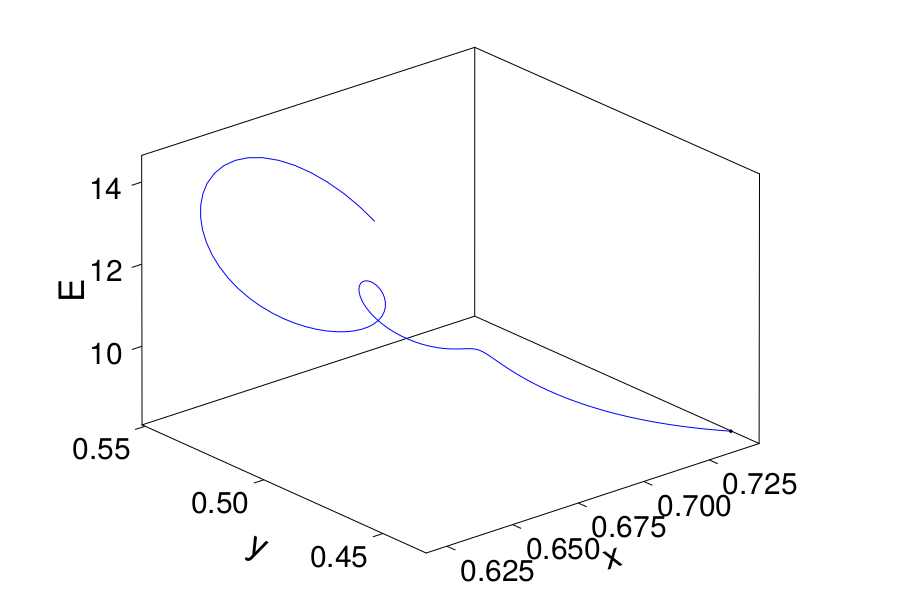

CairoMakie.Screen{IMAGE}


In [10]:
tst_homoclinic, ted_homoclinic = 9000, 10000
tst_loop_backward, tend_loop_backward = 1, 276
tst_from_loop, ted_from_loop = 1, length(sol_inher_froom_loop)

indexx,indexy,indexz = 2, 3, 1
lb_size = 35; tck_size = 30;

CairoMakie.activate!()
f = Figure(resolution = (900, 600))
axis3 = Axis3(f[1, 1], xlabel = "x", ylabel = "y", zlabel = "E",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
                xgridvisible = false, ygridvisible = false, zgridvisible = false)


#axis3 = LScene(f[1, 1], show_axis = true)
#scale!(axis3.scene, 50, 50, 1)


# в прямом времени гомоклиника
#lines!(axis3, sol[indexx, tst_homoclinic:ted_homoclinic], sol[indexy, tst_homoclinic:ted_homoclinic], sol[indexz,tst_homoclinic:ted_homoclinic], linewidth = 1.0, color = :green)

# петля в обратном времени
lines!(axis3, sol_loop_backward[indexx, tst_loop_backward:tend_loop_backward], sol_loop_backward[indexy, tst_loop_backward:tend_loop_backward], sol_loop_backward[indexz,tst_loop_backward:tend_loop_backward], linewidth = 1.0, color = :blue)

# Наследование с петли в обратном времени
#lines!(axis3, sol_inher_froom_loop[indexx, tst_from_loop:ted_from_loop], sol_inher_froom_loop[indexy, tst_from_loop:ted_from_loop], sol_inher_froom_loop[indexz, tst_from_loop:ted_from_loop], linewidth = 1.0, color = :red)

# предельный цикл
#lines!(axis3, sol_cycle[indexx, ts:tf], sol_cycle[indexy, ts:tf], sol_cycle[indexz,ts:tf], linewidth = 1.0, color = :black)

scatter!(axis3, fp[1][indexx], fp[1][indexy], fp[1][indexz], color = :black, markersize = 5.0)

display(f)
#display(GLMakie.Screen(), f)

In [1]:
range(0.0, 50.0, length = 101)

0.0:0.5:50.0